# Importaciones

In [1]:
from imports import *                    # pandas, numpy, etc.
from trading_environment import (
    DataManager,
    Optimizer,
    PerformanceAnalyzer,
    ReportManager,
    RiskManager,
    DATA_DIR,
    MAX_FILE_SIZE,
    REPORT_DIR
)
from strategies import (
    MovingAverageCrossStrategy,
    DcaStrategy,
    DonchianBreakoutStrategy,
    ADXTrendStrategy,
    ROCStrategy,
    MACDStrategy,
    BollingerMeanRevStrategy,
    RSIStrategy,
    PairTradingStrategy,
    VWAPStrategy
)

d:\Desktop\Algorithmic Trading\Prueba\venv310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Strategies

In [2]:
# 1) Load data
dm = DataManager(data_dir=DATA_DIR, max_file_size=MAX_FILE_SIZE)
data = dm.load_data(
    symbols='BTC-USD',
    period='2y',
    interval='1d'
)

In [3]:
strategies = [
    MovingAverageCrossStrategy, DcaStrategy, DonchianBreakoutStrategy,
    ADXTrendStrategy, ROCStrategy, MACDStrategy, BollingerMeanRevStrategy,
    RSIStrategy, PairTradingStrategy, VWAPStrategy
]

# run Bayesian optimisation on each and pick the best overall by Sharpe:
best_strategy, best_params, perf_df, equity_map = Optimizer.find_best_strategy(
    strategies,
    data,
    method='bayes',
    metric='Sharpe',
    n_trials=50,       # passed into optimize_bayesian
    seed=42
)



In [4]:
print("Best strategy:", best_strategy)
print("Params:       ", best_params)

Best strategy: <strategies.DcaStrategy object at 0x0000019545D22FB0>
Params:        {'amount': 601.9542320695084, 'freq': 'W'}


In [5]:
perf_df

,Total Return,Ann. Return,Ann. Vol,Sharpe,Max Drawdown,Win Rate,Profit Factor,Expectancy
strategy,,,,,,,,
DCA 601.9542320695084@W,2.836206,0.588603,0.394769,1.368815,-0.281445,0.510929,1.289113,0.002124
RSI 7,0.985263,0.266273,0.189311,1.339967,-0.150198,0.088798,1.959525,-0.014605
MA 15/100,0.160253,0.052502,0.039728,1.307543,-0.001656,0.009563,49.514412,-0.001330
VWAP,2.469383,0.534576,0.402753,1.263555,-0.281445,0.527322,1.257557,0.001997
MACD 8/80/27,0.317968,0.099711,0.086352,1.142810,-0.051127,0.031421,3.009816,-0.013228
Donchian 50,0.678097,0.195077,0.197518,0.999340,-0.150534,0.080601,1.600999,-0.014156
MA 45/190 + ADX,0.050272,0.017029,0.021334,0.801978,0.000000,0.002732,NaN,0.000068
ROC 35,0.922999,0.252458,0.401025,0.761409,-0.418827,0.491803,1.150970,0.000352
BB Rev 10/2.73235229154987,0.015513,0.005314,0.009102,0.586739,0.000000,0.001366,NaN,0.000021


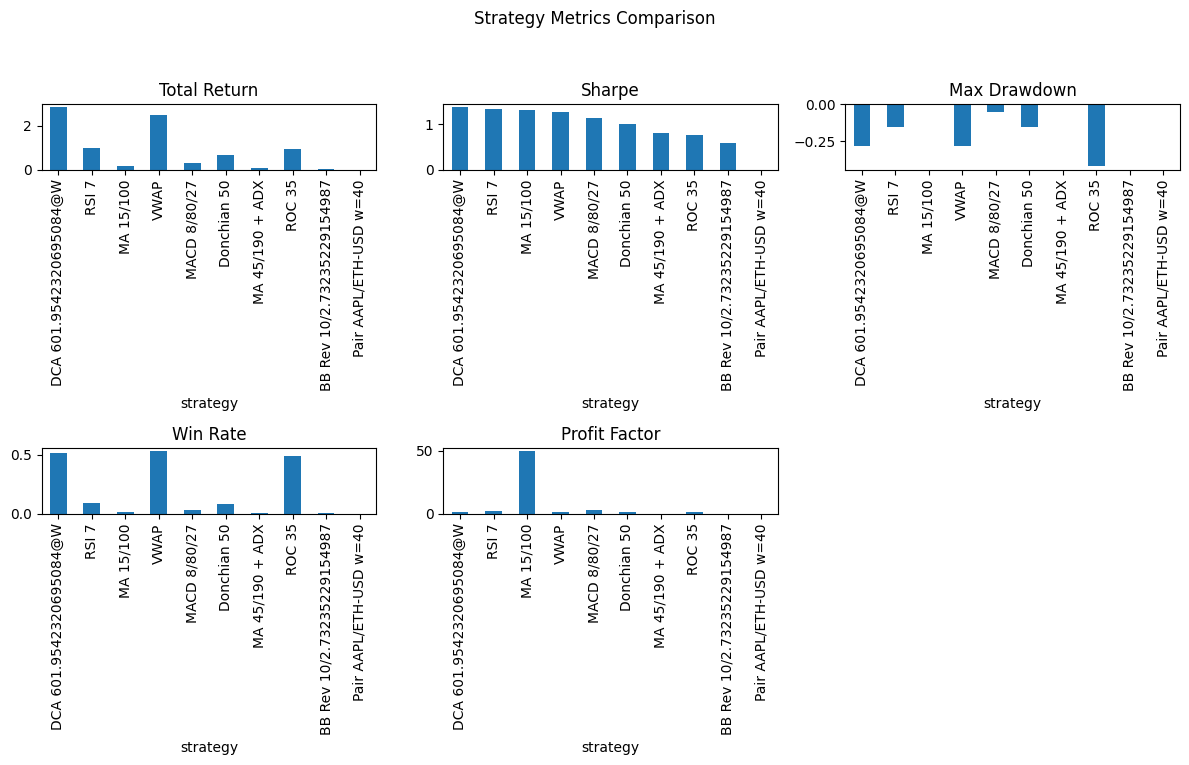

In [6]:
rm = ReportManager()
rm.plot_metrics(
    perf_df,
    metrics=['Total Return', 'Sharpe', 'Max Drawdown', 'Win Rate', 'Profit Factor']
)

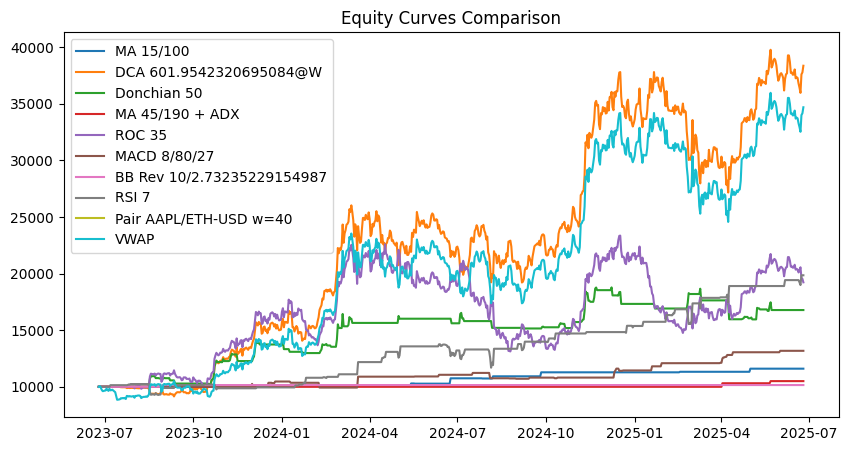

In [7]:
# Overlay equity curves
rm.plot_equity_curves(equity_map)


# FIN